In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [11]:
df=pd.read_excel('yeartwo.xlsx')
df.head(-5)

COURSE  SEMESTER 3 (%)  SEMESTER 4 (%)  SECOND YEAR PERCENTAGE(100)  \
0       IT            61.6            74.0                        67.80   
1       IT            64.0            70.3                        67.15   
2       IT            74.6            83.6                        79.10   
3       IT            63.2            73.5                        68.35   
4       IT            66.6            80.6                        73.60   
..     ...             ...             ...                          ...   
97      CS            72.0            64.3                        68.15   
98      CS            68.0            69.0                        68.50   
99      CS            69.0            72.7                        70.85   
100     CS            75.2            68.0                        71.60   
101     CS            71.0            61.3                        66.15   

     SECOND YEAR PERCENTAGE(20)  
0                         13.56  
1                         13.43  
2                         15.82  
3                         13.67  
4                         14.72  
..                          ...  
97                        13.63  
98                        13.70  
99                        14.17  
100                       14.32  
101                       13.23  

[102 rows x 5 columns]

In [13]:
df.isnull().sum()

COURSE                         0
SEMESTER 3 (%)                 1
SEMESTER 4 (%)                 1
SECOND YEAR PERCENTAGE(100)    2
SECOND YEAR PERCENTAGE(20)     2
dtype: int64

In [14]:
#droping null value because its back semester
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

COURSE                         0
SEMESTER 3 (%)                 0
SEMESTER 4 (%)                 0
SECOND YEAR PERCENTAGE(100)    0
SECOND YEAR PERCENTAGE(20)     0
dtype: int64

In [16]:
df.shape

(105, 5)

In [17]:
df.dtypes

COURSE                          object
SEMESTER 3 (%)                 float64
SEMESTER 4 (%)                 float64
SECOND YEAR PERCENTAGE(100)    float64
SECOND YEAR PERCENTAGE(20)     float64
dtype: object

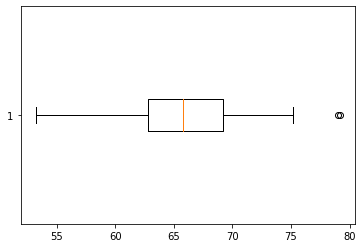

In [18]:
#OUTLIER
plt.boxplot(df['SEMESTER 3 (%)'],vert=False)
plt.show()

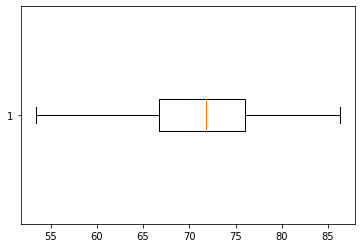

In [19]:
#OUTLIER
plt.boxplot(df['SEMESTER 4 (%)'],vert=False)
plt.show()

In [20]:
X=df[['SEMESTER 3 (%)','SEMESTER 4 (%)']]
y=df['SECOND YEAR PERCENTAGE(20)']

In [21]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.5)

In [23]:
model1=LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [24]:
ypred = model1.predict(x_test)

In [25]:
model1.score(x_test, y_test)

1.0

In [26]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,ypred)
MSE

1.9647101790410104e-30

In [27]:
model1.predict([[60.790,60.790]])

array([12.158])

In [28]:
#SAVING MODEL USING PICKLE
pickle.dump(model1, open('model2.pkl', 'wb'))

In [29]:
#LOADING MODEL 
pickled_model2 = pickle.load(open('model2.pkl', 'rb'))
pickled_model2.predict([[50.5, 60]])

array([11.05])